<a href="https://colab.research.google.com/github/NehaMariamToney/machine-learning/blob/main/DiabetesML(KNN%2CNB%2CSVM%2CDecisionTree%2CRandomForest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DIABETES PREDICTION**

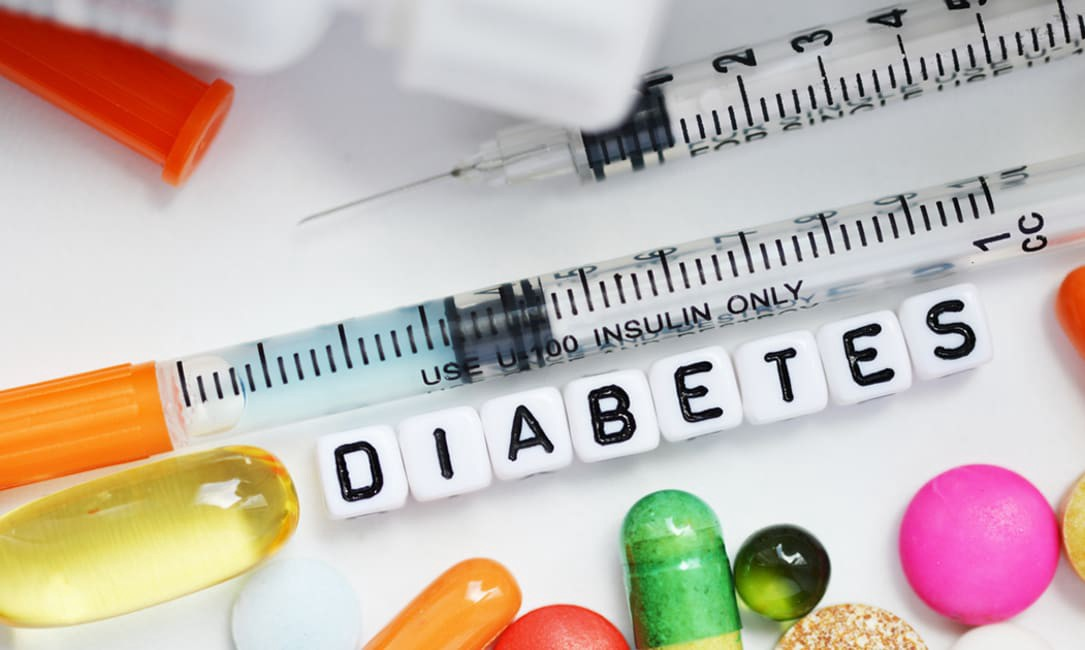

**DATASET DESCRIPTION**

  The data is taken from "https://www.kaggle.com/mathchi/diabetics-data-set".  
  
This dataset is originally from National Institute of Diabetes and digestive and Kidney Diseases. All the patients here are female 21 years or older. It contains the following columns:

1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure(mm Hg)
4. SkinThickness: Triceps skin fold thickness(mm)
5. Insulin: 2-Hour serum insulin(mu U/ml)
6. BMI: Body mass index(weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age(years)
9. Outcome: Class variable(0 or 1)  


IMPORTING DATA AND LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
df=pd.read_csv("/content/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


PREPROCESSING

In [ ]:
#head: first 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#tail: last 5 rows
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
#column name
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#total no. of rows and columns
df.shape

(768, 9)

In [ ]:
#info: Data has 768 rows and 9 columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#checking for missing values
df.isna().sum()   #no missing values at first glance

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#checking for duplicate values
df.duplicated().sum()   #no duplicated values

0

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We note that minimum value for columns such as Glucose, BP, Insulin, BMI are 0 which is not possible, hence these must be missing values which are encoded as 0. We can use imputation technique to deal with these

In [ ]:
corrupted_data=df.loc[:,'Glucose':'BMI']
corrupted_data.replace(0,np.nan,inplace=True)
df.loc[:,'Glucose':'BMI']=corrupted_data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
glucose=df['Glucose'].mean()
df['Glucose'].fillna(glucose,inplace=True)
bloodpressure=df['BloodPressure'].mean()
df['BloodPressure'].fillna(bloodpressure,inplace=True)
skinthickness=df['SkinThickness'].mean()
df['SkinThickness'].fillna(skinthickness,inplace=True)
insulin=df['Insulin'].mean()
df['Insulin'].fillna(insulin,inplace=True)
bmi=df['BMI'].mean()
df['BMI'].fillna(bmi,inplace=True)

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#df.dropna(subset=['Glucose','BMI'],inplace=True)  #dropping rows with missing values
# for i in df:
#   df[i].fillna(df[i].mean(),inplace=True)  #filling missing values with mean
# df.isna().sum()  #rechecking missing values

DATA VISUALISATION

<Axes: >

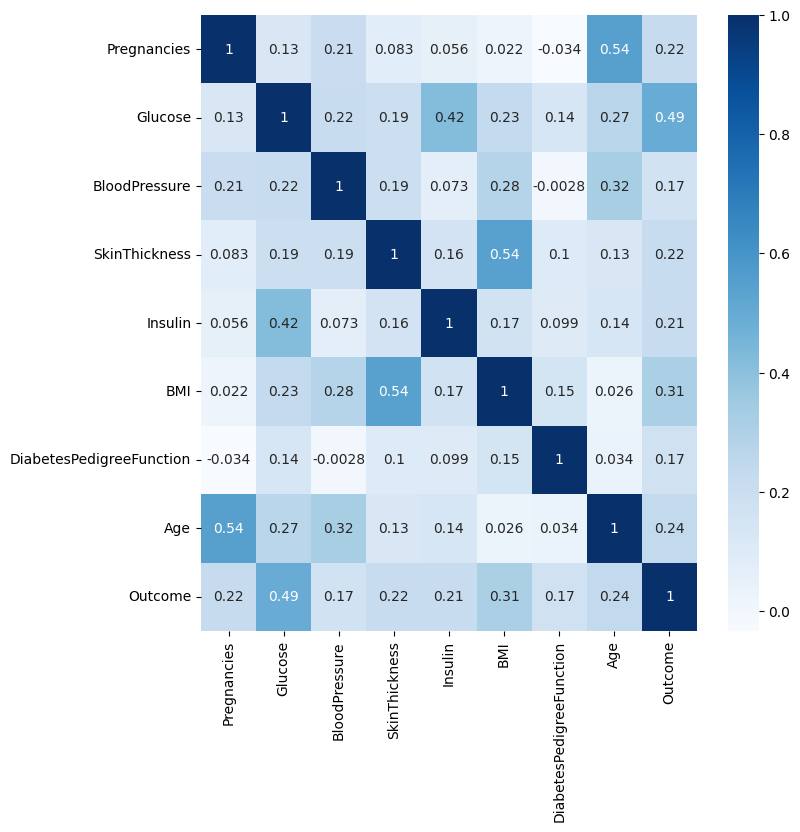

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


Major factor=Glucose(0.49)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

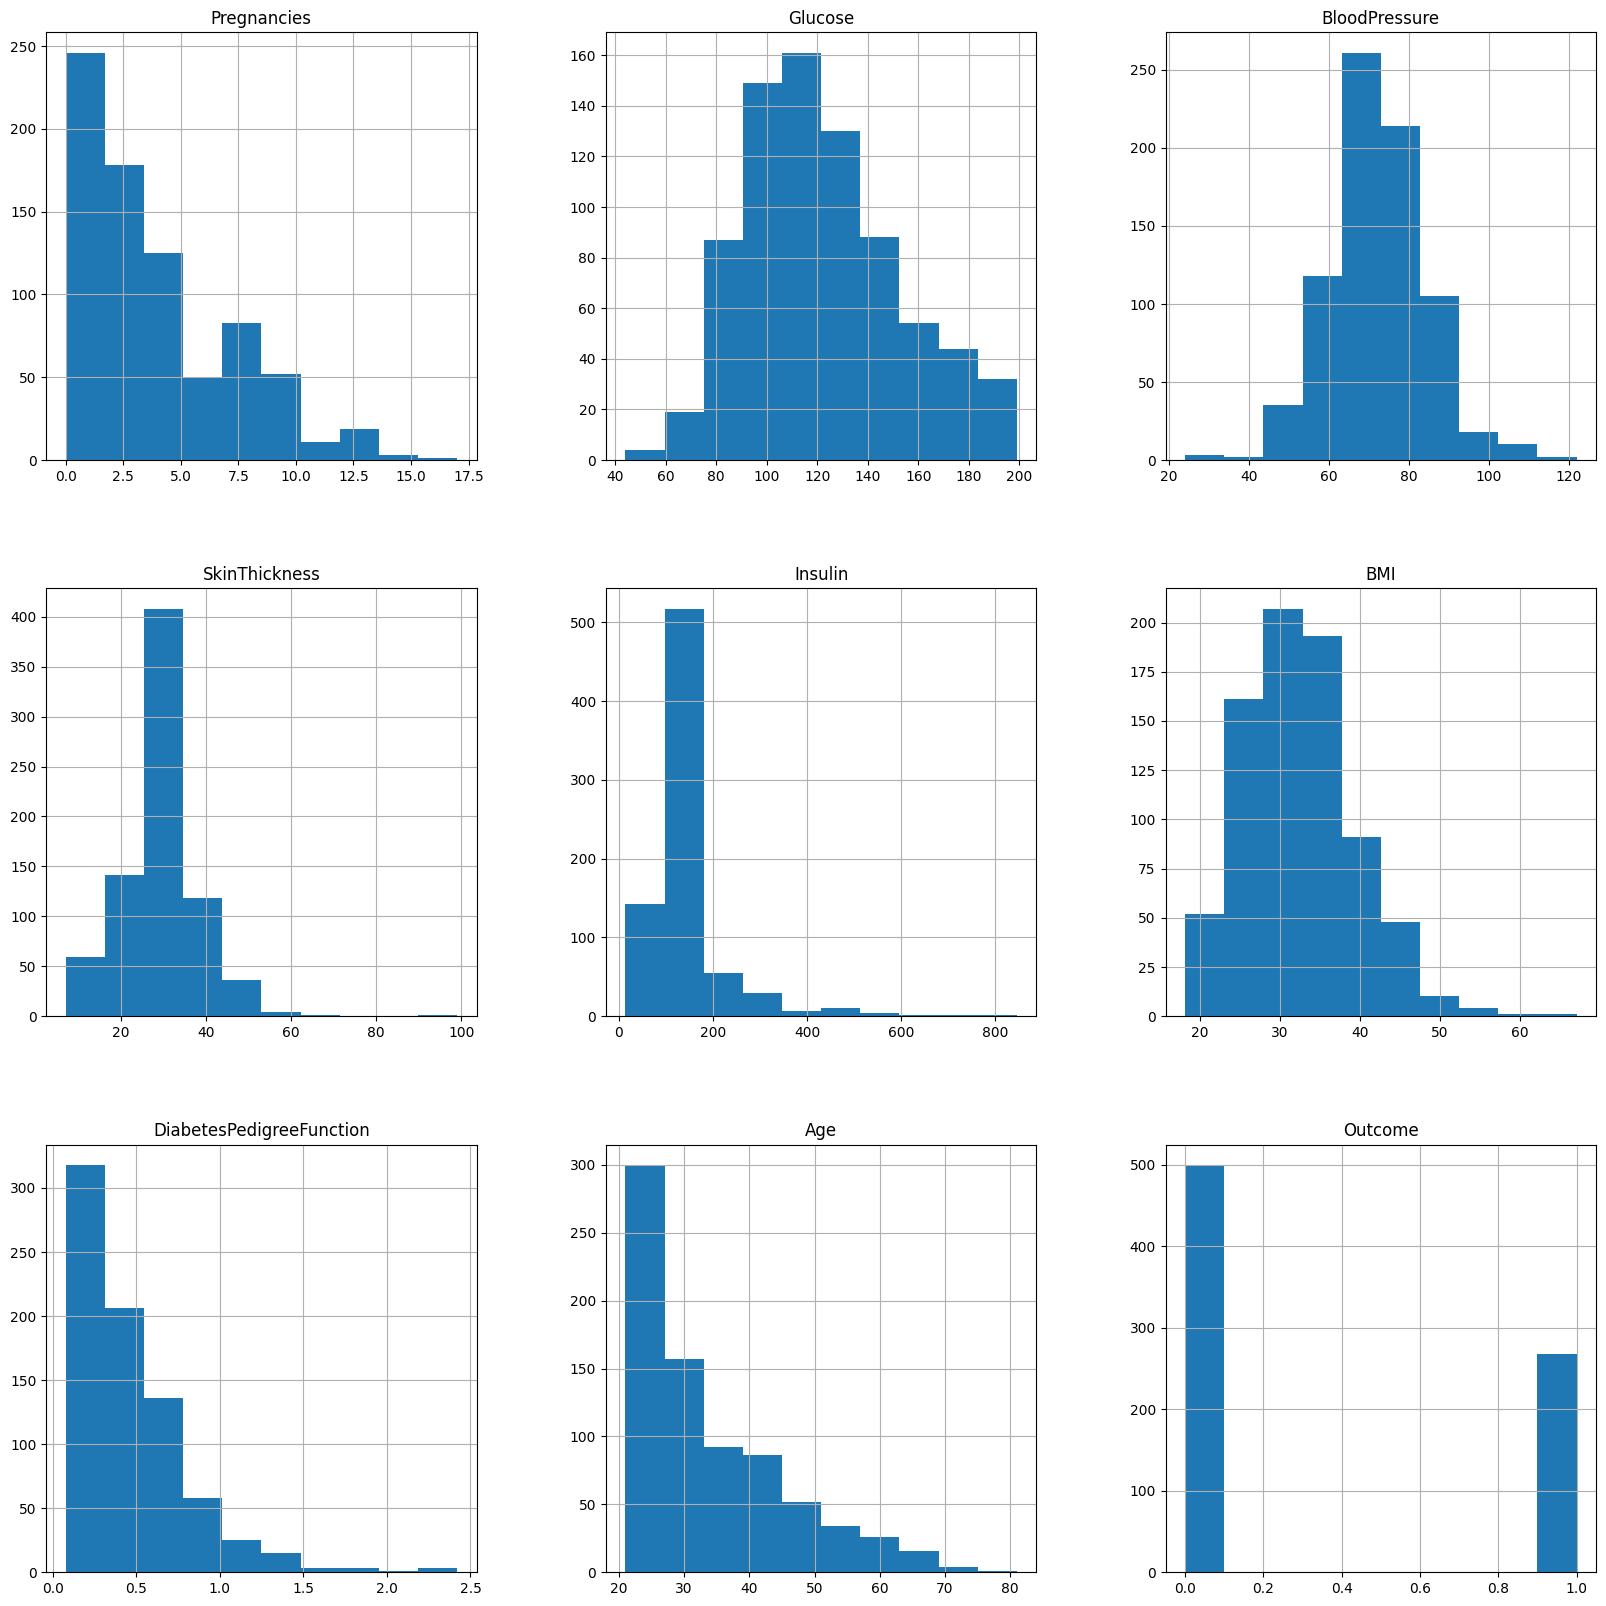

In [ ]:
#to see how the data is distributed
df.hist(figsize=(20,20))

In [ ]:
#input data
x=df.iloc[:,:-1].values
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
#output data
y=df.iloc[:,-1].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
#dimension of x (input should be 2 dimension and output should be 1 dimension)
x.ndim

2

In [ ]:
#dimension of y
y.ndim

1

In [ ]:
#Training and Testing data spliting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train  #input training data

array([[  1.        ,  95.        ,  60.        , ...,  23.9       ,
          0.26      ,  22.        ],
       [  5.        , 105.        ,  72.        , ...,  36.9       ,
          0.159     ,  28.        ],
       [  0.        , 135.        ,  68.        , ...,  42.3       ,
          0.365     ,  24.        ],
       ...,
       [ 10.        , 101.        ,  86.        , ...,  45.6       ,
          1.136     ,  38.        ],
       [  0.        , 141.        ,  72.40518417, ...,  42.4       ,
          0.205     ,  29.        ],
       [  0.        , 125.        ,  96.        , ...,  22.5       ,
          0.262     ,  21.        ]])

In [ ]:
x_test  #input testing data

array([[6.00e+00, 9.80e+01, 5.80e+01, ..., 3.40e+01, 4.30e-01, 4.30e+01],
       [2.00e+00, 1.12e+02, 7.50e+01, ..., 3.57e+01, 1.48e-01, 2.10e+01],
       [2.00e+00, 1.08e+02, 6.40e+01, ..., 3.08e+01, 1.58e-01, 2.10e+01],
       ...,
       [0.00e+00, 1.27e+02, 8.00e+01, ..., 3.63e+01, 8.04e-01, 2.30e+01],
       [6.00e+00, 1.05e+02, 7.00e+01, ..., 3.08e+01, 1.22e-01, 3.70e+01],
       [5.00e+00, 7.70e+01, 8.20e+01, ..., 3.58e+01, 1.56e-01, 3.50e+01]])

In [ ]:
y_train   #output training data

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,

In [ ]:
y_test   #output testing data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

NORMALISATION

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)
x_train  #normalised input training data

array([[-0.8362943 , -0.89610788, -1.00440048, ..., -1.20403257,
        -0.61421636, -0.94861028],
       [ 0.39072767, -0.56399695, -0.02026586, ...,  0.66428525,
        -0.90973787, -0.43466673],
       [-1.14304979,  0.43233584, -0.34831073, ...,  1.44035573,
        -0.30699103, -0.77729576],
       ...,
       [ 1.92450513, -0.69684133,  1.12789121, ...,  1.91462102,
         1.94892066,  0.42190587],
       [-1.14304979,  0.63160239,  0.01296379, ...,  1.45472741,
        -0.77514391, -0.34900947],
       [-1.14304979,  0.10022491,  1.9480034 , ..., -1.40523602,
        -0.60836445, -1.03426754]])

In [ ]:
x_test  #normalised input testing  data

array([[ 0.52338715, -0.73944644, -1.24846457, ...,  0.16930809,
        -0.15228198,  0.7860505 ],
       [-0.59092098, -0.28934861,  0.18823722, ...,  0.4251709 ,
        -1.07730552, -1.05908052],
       [-0.59092098, -0.41794799, -0.74139335, ..., -0.31231603,
        -1.04450327, -1.05908052],
       ...,
       [-1.14807505,  0.19289907,  0.61079657, ...,  0.51547542,
         1.0745223 , -0.89134133],
       [ 0.52338715, -0.51439752, -0.23432213, ..., -0.31231603,
        -1.16259138,  0.28283295],
       [ 0.24481012, -1.41459319,  0.77982031, ...,  0.44022165,
        -1.05106372,  0.11509377]])

  MODEL CREATION

1.Model Creation Using KNN

In [ ]:
#Model Creation
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(x_train,y_train)
#prediction
y_pred=KNN_model.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
#Performance Evaluation
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report
#Confusion Matrix
KNN_result=confusion_matrix(y_test,y_pred)
KNN_result

array([[114,  37],
       [ 34,  46]])

In [ ]:
#Accuracy Score
KNN_score=accuracy_score(y_test,y_pred)
KNN_score

0.6926406926406926

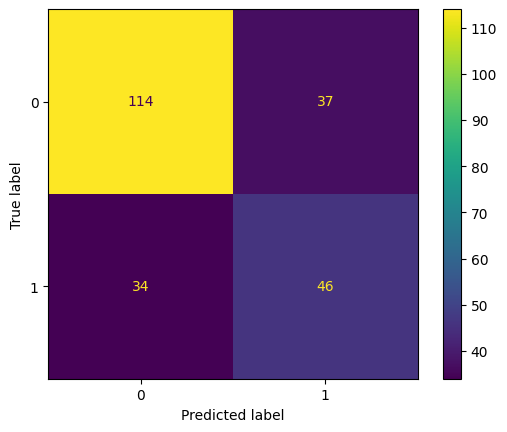

In [ ]:
cmd=ConfusionMatrixDisplay(KNN_result)
cmd.plot()

In [ ]:
#Classification Report
KNN_report=classification_report(y_test,y_pred)
print(KNN_report)

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.57      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.70      0.69      0.69       231



2.Model Creation Using Naive Bayes

In [ ]:
from pandas.core.common import random_state
#Model Creation
from sklearn.naive_bayes import GaussianNB
NB_model=GaussianNB()
NB_model.fit(x_train,y_train)
#prediction
y_predNB=NB_model.predict(x_test)
y_predNB

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#Performance Evaluation
#Confusion Matrix
NB_result=confusion_matrix(y_test,y_predNB)
NB_result

array([[123,  28],
       [ 30,  50]])

In [ ]:
#Accuracy Score
NB_score=accuracy_score(y_test,y_predNB)
NB_score

0.7489177489177489

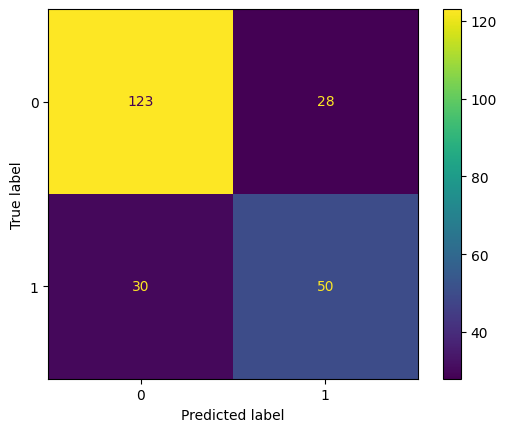

In [ ]:
NB_cmd=ConfusionMatrixDisplay(NB_result)
NB_cmd.plot()

In [ ]:
#Classification Report
NB_report=classification_report(y_test,y_predNB)
print(NB_report)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.64      0.62      0.63        80

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



3.Model Creation Using SVM

In [ ]:
#Model Creation
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(x_train,y_train)
#prediction
y_predsvm=svm_model.predict(x_test)
y_predsvm

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
#Performance Evaluation
#Confusion Matrix
svm_result=confusion_matrix(y_test,y_predsvm)
svm_result

array([[125,  26],
       [ 36,  44]])

In [ ]:
#Accuracy Score
svm_score=accuracy_score(y_test,y_predsvm)
svm_score

0.7316017316017316

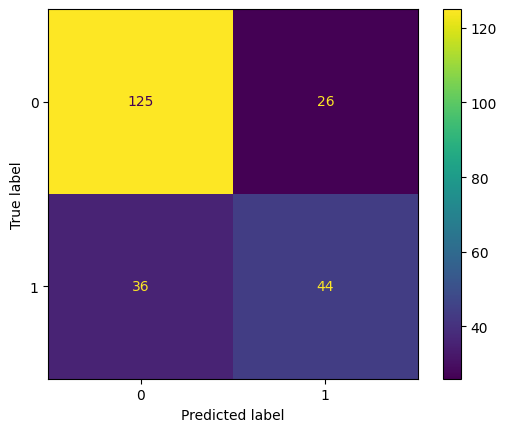

In [ ]:
cmdsvm=ConfusionMatrixDisplay(svm_result)
cmdsvm.plot()

In [ ]:
#Classification Report
svm_report=classification_report(y_test,y_predsvm)
print(svm_report)

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       151
           1       0.63      0.55      0.59        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.73      0.73      0.73       231



4.Model Creation using Decision Tree

In [ ]:
#Model Creation
from sklearn.tree import DecisionTreeClassifier
model_DT=DecisionTreeClassifier(criterion='entropy')
model_DT.fit(x_train,y_train)
#Prediction
y_predDT=model_DT.predict(x_test)
y_predDT

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#Performance Evaluation
#Confusion Matrix
DT_result=confusion_matrix(y_test,y_predDT)
DT_result

array([[118,  33],
       [ 32,  48]])

In [ ]:
#Accuracy Score
DT_score=accuracy_score(y_test,y_predDT)
DT_score

0.7186147186147186

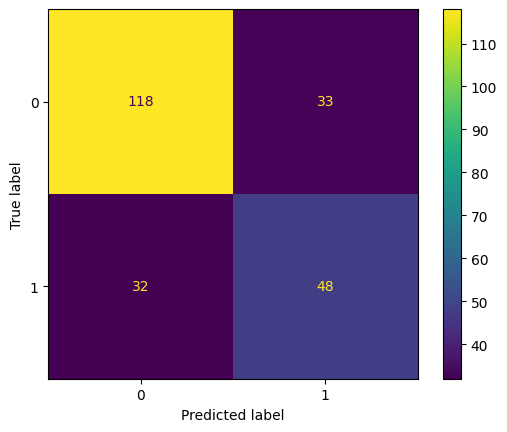

In [ ]:
cmdDT=ConfusionMatrixDisplay(DT_result)
cmdDT.plot()

In [ ]:
#Classification Report
DT_report=classification_report(y_test,y_predDT)
print(DT_report)

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       151
           1       0.59      0.60      0.60        80

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



5.Model Creation using Random Forest

In [ ]:
#Model Creation
from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier(n_estimators=50,random_state=42)
model_RF.fit(x_train,y_train)
#prediction
y_predRF=model_RF.predict(x_test)
y_predRF

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
#Performance Evaluation
#Confusion Matrix
RF_result=confusion_matrix(y_test,y_predRF)
RF_result

array([[122,  29],
       [ 33,  47]])

In [ ]:
#Accuracy Score
RF_score=accuracy_score(y_test,y_predRF)
RF_score

0.7316017316017316

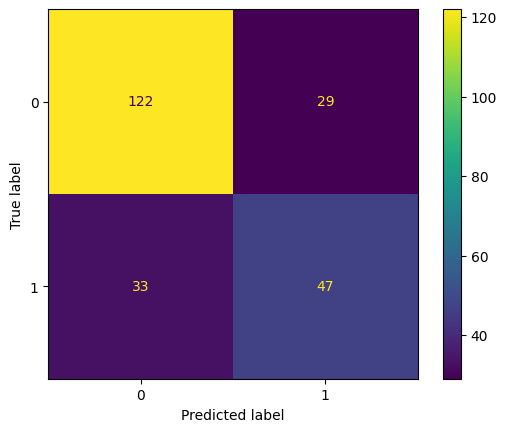

In [ ]:
cmdRF=ConfusionMatrixDisplay(RF_result)
cmdRF.plot()

In [ ]:
#Classification Report
RF_report=classification_report(y_test,y_predRF)
print(RF_report)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.62      0.59      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



Highest accuracy score

In [ ]:
lst=[KNN_score,NB_score,svm_score,DT_score,RF_score]
name=['KNN','Naive Bayes','SVM','Decision Tree','Random Forest']

<BarContainer object of 5 artists>

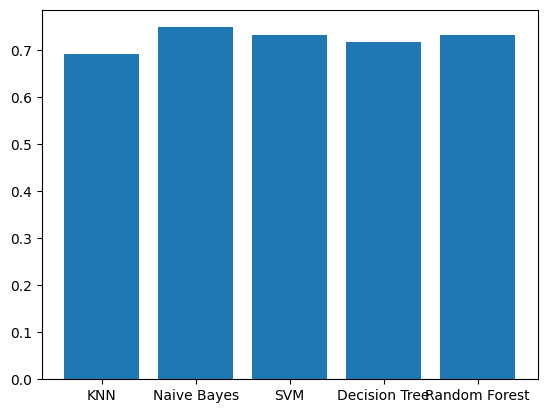

In [ ]:
plt.bar(name,lst)

model selected is Naive Bayes